In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# Step 1: Import the dataset into a Pandas DataFrame
file_path = "Fraud_Detection_Transactions__1000_Samples_.csv" 
df = pd.read_csv(file_path)

In [4]:
df.head()

,Transaction_ID,Amount,Transaction_Type,Card_Type,Is_Fraud
0,T0001,267.89,In-store,Credit,0
1,T0002,2661.46,Online,Debit,0
2,T0003,2707.77,In-store,Credit,0
3,T0004,3190.78,Online,Debit,0
4,T0005,3633.20,Online,Debit,0


In [5]:
# Step 2: Convert necessary columns to NumPy arrays
df_encoded = pd.get_dummies(df, columns=["Transaction_Type", "Card_Type"], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(["Transaction_ID", "Is_Fraud"], axis=1).values  # Exclude ID and target
y = df_encoded["Is_Fraud"].values  # Target variable


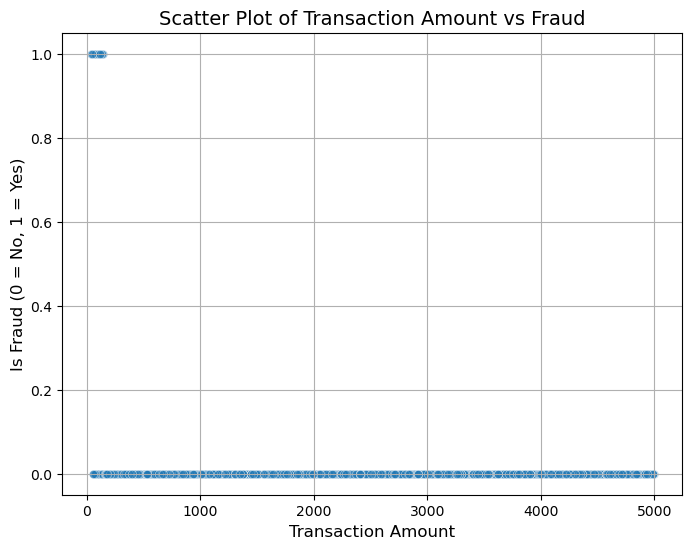

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Amount"], y=df["Is_Fraud"], alpha=0.6)
plt.title("Scatter Plot of Transaction Amount vs Fraud", fontsize=14)
plt.xlabel("Transaction Amount", fontsize=12)
plt.ylabel("Is Fraud (0 = No, 1 = Yes)", fontsize=12)
plt.grid(True)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Step 3: Split the dataset into training and test sets, split the data into training (70%) and test (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Step 4: Train a Logistic Regression model
model = LogisticRegression(class_weight="balanced", random_state=42)
#model = LogisticRegression(class_weight={0: 1, 1: 5}, random_state=42)
#model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [10]:
# Step 5: Make predictions
y_pred = model.predict(X_test_scaled)

In [11]:
print("Coefficients:", model.coef_)  # Coefficients for each feature
print("Intercept:", model.intercept_)  # Intercept term

Coefficients: [[-5.82240056  2.24146358 -2.28635342]]
Intercept: [-11.0100878]


In [12]:
y_test.sum()


4

In [13]:
y_pred.sum()

10

In [14]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.4


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.98


In [16]:
recall=recall_score(y_test,y_pred)
print("Recall:", recall)

Recall: 1.0


In [17]:
f1=f1_score(y_test,y_pred)
print("F1:", f1)

F1: 0.5714285714285715


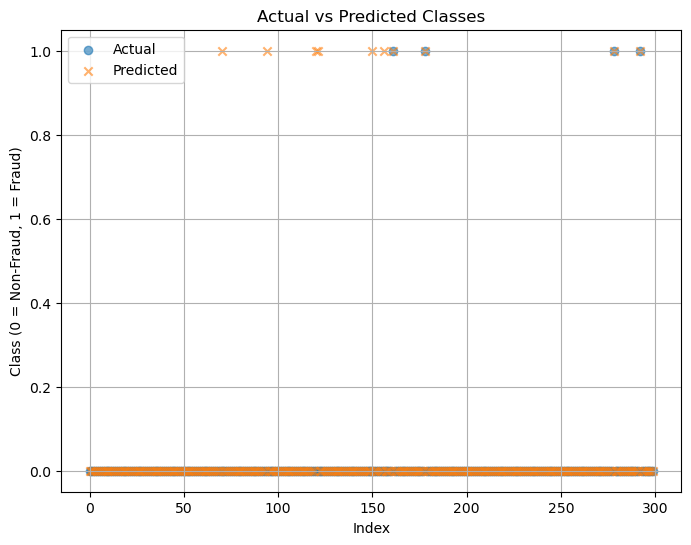

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, label="Predicted", alpha=0.6, marker='x')
plt.title("Actual vs Predicted Classes")
plt.xlabel("Index")
plt.ylabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.legend()
plt.grid()
plt.show()

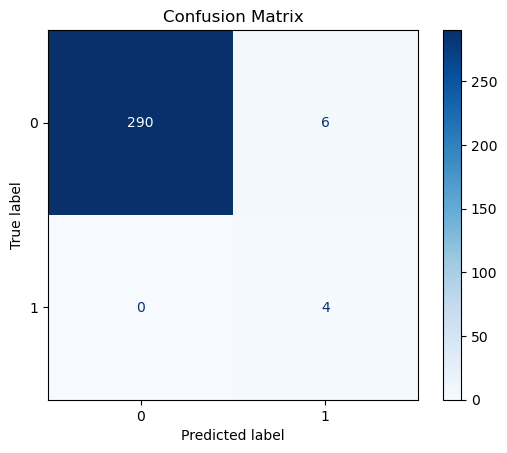

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix as a heatmap
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()
